<a href="https://colab.research.google.com/github/khalifah110/Local-Economic-Dasboard/blob/main/Local_Economy_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instaling pandas,matplotlib,seaborn
!pip install pandas matplotlib seaborn plotly statsmodels pandas_datareader


In [3]:
# installing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
import pandas_datareader as pdr
import datetime
import numpy as np


In [8]:
from pandas_datareader import wb

# Fetch Nigeria GDP (NY.GDP.MKTP.CD)
data = wb.download(indicator='NY.GDP.MKTP.CD', country='NG', start=2000, end=2023)

# Reset index and rename columns
data = data.reset_index()
data.columns = ['Country', 'Year', 'GDP']
data = data.sort_values('Year')

# Show the last few rows
data.tail()



,Country,Year,GDP
4,Nigeria,2019,4.745175e+11
3,Nigeria,2020,4.321989e+11
2,Nigeria,2021,4.408336e+11
1,Nigeria,2022,4.774034e+11
0,Nigeria,2023,3.638463e+11


In [9]:
# Assuming 'data' is what we got from wb.download()

# Check for missing values
print(data.isnull().sum())

# Remove any rows with missing GDP values (optional if few)
data = data.dropna(subset=['GDP'])

# Convert year to integer (if it's not already)
data['Year'] = data['Year'].astype(int)

# Sort the data by year
data = data.sort_values('Year').reset_index(drop=True)

# Preview cleaned data
print(data.head())


Country    0
Year       0
GDP        0
dtype: int64
   Country  Year           GDP
0  Nigeria  2000  6.917145e+10
1  Nigeria  2001  7.355784e+10
2  Nigeria  2002  9.505406e+10
3  Nigeria  2003  1.047390e+11
4  Nigeria  2004  1.357647e+11


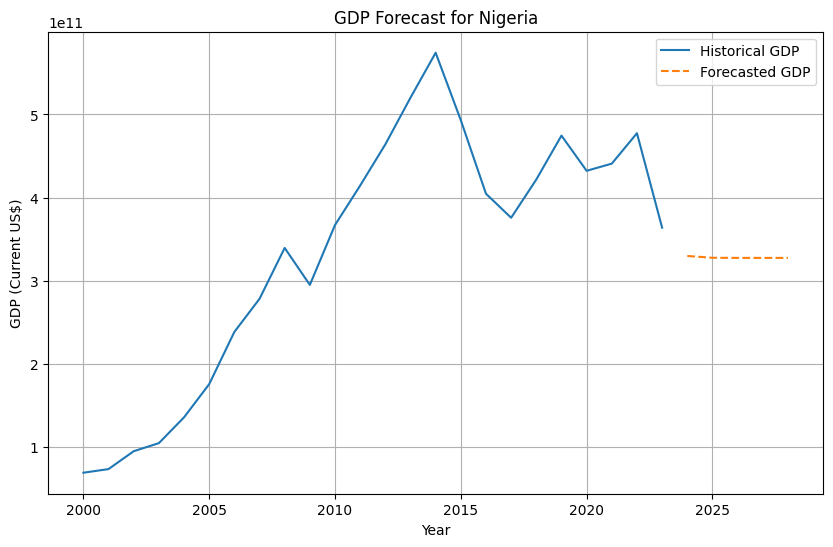

In [10]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare GDP series for forecasting (sorted by year)
gdp_series = data.set_index('Year')['GDP']

# Create and fit ARIMA model (auto-order tuning skipped for simplicity)
model = ARIMA(gdp_series, order=(1,1,1))
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)

# Plot original + forecast
plt.figure(figsize=(10,6))
gdp_series.plot(label='Historical GDP')
forecast.index = range(gdp_series.index[-1] + 1, gdp_series.index[-1] + 6)
forecast.plot(label='Forecasted GDP', style='--')
plt.title('GDP Forecast for Nigeria')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.legend()
plt.grid(True)
plt.show()


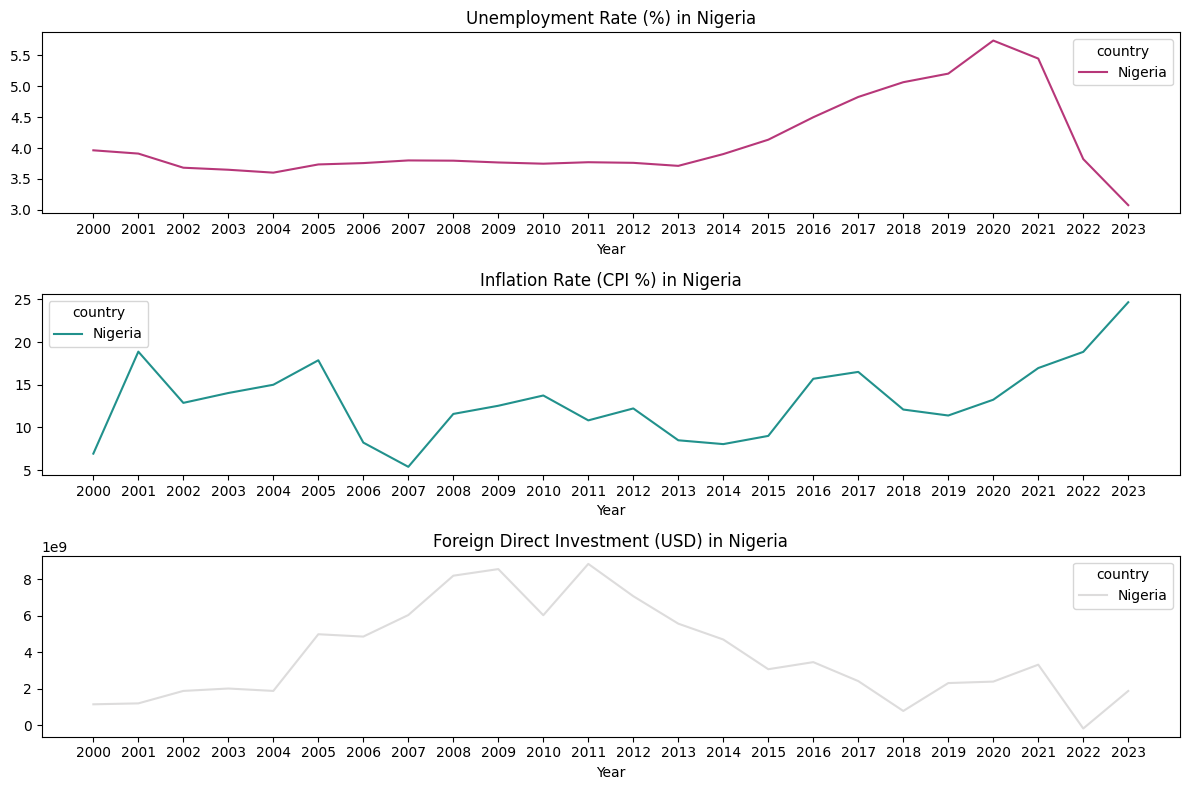

In [14]:
# Step 1: Define time range and country
# Note: wb.download uses integer years for start and end
start_year = 2000
end_year = 2023
country = 'NG'  # Nigeria

# Step 2: Fetch data using World Bank API via wb.download
unemployment = wb.download(indicator='SL.UEM.TOTL.ZS', country=country, start=start_year, end=end_year)
inflation = wb.download(indicator='FP.CPI.TOTL.ZG', country=country, start=start_year, end=end_year)
fdi = wb.download(indicator='BX.KLT.DINV.CD.WD', country=country, start=start_year, end=end_year)

# Step 3: Prepare DataFrames
# wb.download returns a DataFrame with 'country' and 'year' as index by default
# Reset index to turn them into columns for pivoting/plotting if needed
unemployment = unemployment.reset_index().pivot(index='year', columns='country', values='SL.UEM.TOTL.ZS')
inflation = inflation.reset_index().pivot(index='year', columns='country', values='FP.CPI.TOTL.ZG')
fdi = fdi.reset_index().pivot(index='year', columns='country', values='BX.KLT.DINV.CD.WD')


# Sort index for consistency (index is now 'year')
unemployment.sort_index(inplace=True)
inflation.sort_index(inplace=True)
fdi.sort_index(inplace=True)

# Step 4: Plot all 3 indicators
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
# Pass the DataFrame directly to sns.lineplot, it handles the index as x-axis
sns.lineplot(data=unemployment, palette="magma")
plt.title('Unemployment Rate (%) in Nigeria')
plt.xlabel('Year') # Add x-label for clarity

plt.subplot(3, 1, 2)
sns.lineplot(data=inflation, palette="viridis")
plt.title('Inflation Rate (CPI %) in Nigeria')
plt.xlabel('Year') # Add x-label for clarity


plt.subplot(3, 1, 3)
sns.lineplot(data=fdi, palette="coolwarm")
plt.title('Foreign Direct Investment (USD) in Nigeria')
plt.xlabel('Year') # Add x-label for clarity


plt.tight_layout()
plt.show()